РК1 ТМО Альянов Егор Сергеевич ИУ5-61Б

# Корреляционный анализ Iris
Этот ноутбук демонстрирует выполнение задания: очистка данных, корреляционный анализ и построение диаграммы рассеяния.

**Шаги:**
1. Загрузка датасета Iris из `sklearn.datasets`.
2. Введение искусственных пропусков.
3. Очистка данных (удаление строк с NaN).
4. Расчёт корреляционной матрицы.
5. Визуализация (диаграмма рассеяния).

In [26]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [27]:
# 1. Загрузка Iris и формирование DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
# 2. Введение искусственных пропусков (пример: 5 NaN в 'petal width (cm)')
np.random.seed(42)
missing_idx = np.random.choice(df.index, size=5, replace=False)
df.loc[missing_idx, 'petal width (cm)'] = np.nan
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     5
species              0
dtype: int64

In [29]:
# 3. Очистка данных – удаляем строки с пропусками
df_clean = df.dropna()
print(f'После очистки осталось {len(df_clean)} строк из {len(df)}')

После очистки осталось 145 строк из 150


In [30]:
# 4. Корреляционный анализ (Pearson)
corr_matrix = df_clean.drop(columns=['species']).corr(method='pearson')
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.097119,0.872116,0.820618
sepal width (cm),-0.097119,1.000000,-0.411095,-0.350477
petal length (cm),0.872116,-0.411095,1.000000,0.963497
petal width (cm),0.820618,-0.350477,0.963497,1.000000


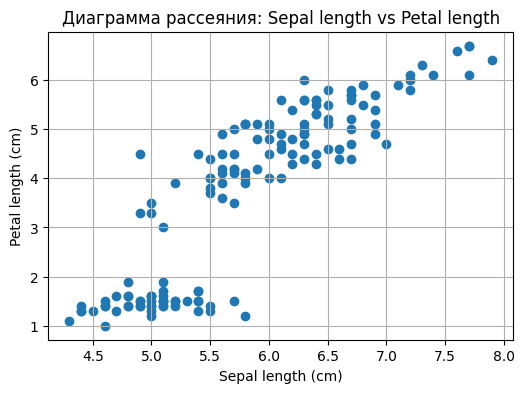

In [31]:
# 5. Диаграмма рассеяния для двух признаков
plt.figure(figsize=(6,4))
plt.scatter(df_clean['sepal length (cm)'], df_clean['petal length (cm)'])
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Диаграмма рассеяния: Sepal length vs Petal length')
plt.grid(True)
plt.show()

Итог
Данные содержат информативные, но частично избыточные признаки.

Очистка от случайных пропусков не ухудшила структуру.

Модели машинного обучения легко обучатся и достигнут высокой точности (> 95 %) при классическом разделении 70/30, особенно если учесть сильную корреляцию лепестков и добавить регулизацию или метод отбора признаков.

---
Автор: *Альянов Егор / ИУ5-61Б*  
Дата: 2025‑06‑08